# Ploting metadata photos

In [1]:
#print(__doc__)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt

from matplotlib.patches import Patch
from matplotlib.lines import Line2D

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

data = pd.read_csv('gps_photos_data.txt', names = ['date','time','latitude','longitude','name_file'], sep=" ")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1274 entries, 0 to 1273
Data columns (total 5 columns):
date         1274 non-null object
time         1274 non-null object
latitude     1274 non-null float64
longitude    1274 non-null float64
name_file    1274 non-null object
dtypes: float64(2), object(3)
memory usage: 49.8+ KB


In [2]:
data.head(5)

,date,time,latitude,longitude,name_file
0,2019:12:25,21:23:01,-13.524298,-71.971593,005.jpg
1,2019:12:25,21:23:02,-13.524298,-71.971593,006.jpg
2,2019:12:25,21:23:03,-13.391979,-72.049106,007.jpg
3,2019:12:25,21:23:04,-13.391979,-72.049106,008.jpg
4,2019:12:21,11:32:12,-13.391929,-72.049114,009.jpg


In [3]:
#concatenating data with time
data['Datetime'] = data['date'] +' '+ data['time']
data.loc[data.Datetime == '2019:12:25 21:23:03']
data['Datetime'] = pd.to_datetime(data['Datetime'], format='%Y:%m:%d %H:%M:%S')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1274 entries, 0 to 1273
Data columns (total 6 columns):
date         1274 non-null object
time         1274 non-null object
latitude     1274 non-null float64
longitude    1274 non-null float64
name_file    1274 non-null object
Datetime     1274 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 59.8+ KB


In [4]:
#sort values by datetime in order to create trayectories
data.sort_values(by=['Datetime'],ascending=True).head(10)

,date,time,latitude,longitude,name_file,Datetime
4,2019:12:21,11:32:12,-13.391929,-72.049114,009.jpg,2019-12-21 11:32:12
5,2019:12:21,11:32:12,-13.391929,-72.049114,010.jpg,2019-12-21 11:32:12
7,2019:12:21,11:32:21,-13.391916,-72.049036,012.jpg,2019-12-21 11:32:21
6,2019:12:21,11:32:21,-13.391916,-72.049036,011.jpg,2019-12-21 11:32:21
8,2019:12:21,11:32:30,-13.391908,-72.048996,013.jpg,2019-12-21 11:32:30
9,2019:12:21,11:32:30,-13.391908,-72.048996,014.jpg,2019-12-21 11:32:30
10,2019:12:21,11:32:42,-13.391914,-72.048917,015.jpg,2019-12-21 11:32:42
11,2019:12:21,11:32:42,-13.391914,-72.048917,016.jpg,2019-12-21 11:32:42
12,2019:12:21,11:32:51,-13.391891,-72.048833,017.jpg,2019-12-21 11:32:51
13,2019:12:21,11:32:51,-13.391891,-72.048833,018.jpg,2019-12-21 11:32:51


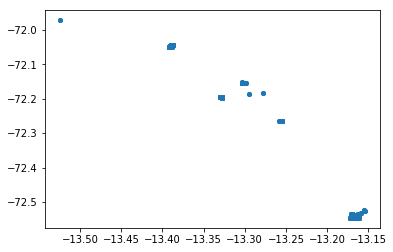

In [5]:
#conver data on list
linex = list(map(float, data['latitude']))
liney = list(map(float, data['longitude']))

plt.plot(linex, liney, 'o', linestyle='none', markersize=4)


## Applying clustering con GPS points

In [6]:
#Apply clustering to separate different places
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

data.shape

(1274, 6)

In [7]:
###############################################################################
# Leyendo data
n = data.shape[0]
dim = 2

#X = np.zeros((n,dim)) 

attributes = ['latitude','longitude']
X = data[attributes].values
labels_true = np.zeros(n)
# X contains values to cluster as lists
X

array([[-13.52429778, -71.97159278],
       [-13.52429778, -71.97159278],
       [-13.39197861, -72.04910556],
       ...,
       [-13.16575472, -72.54504917],
       [-13.16575472, -72.54504917],
       [-13.16567306, -72.54502222]])

## Dbscan clustering

In [8]:
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [9]:
db = DBSCAN(eps=0.05, min_samples=6, metric='euclidean', algorithm='auto', leaf_size=30, p=None, n_jobs=1).fit(X)

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)


In [10]:

print('Number of clusters ', n_clusters_)
# for i in range(0,len(labels)):
#     print(str(labels[i])+" "+ str(i) +'\n')

#adding label as new attribute
label_serie = pd.Series(labels)
data['label'] = label_serie

#Erasing noisy data
data = data.loc[data.label >= 0]


Number of clusters  4


## Visualization clustering

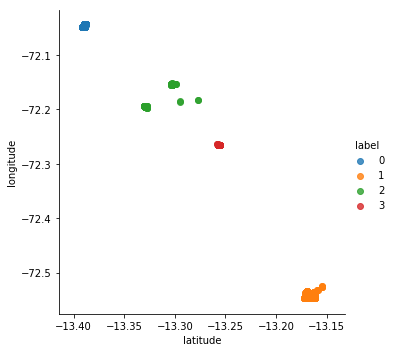

In [11]:
import seaborn as sns
#plot data with seaborn
facet = sns.lmplot(data=data, x='latitude', y='longitude', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)

 # Retrieve cluster information

In [12]:
data.groupby(['label']).size()

label
0    297
1    741
2    158
3     76
dtype: int64

297
741
158
76


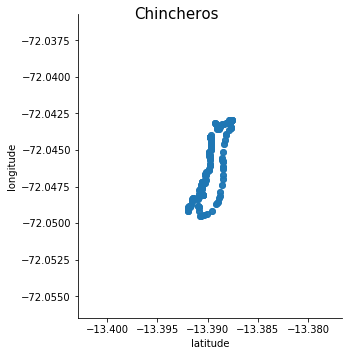

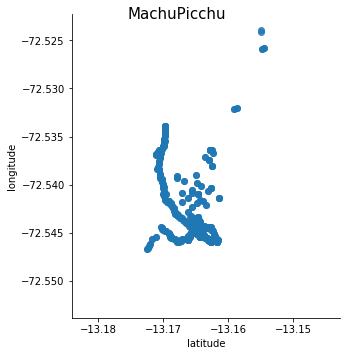

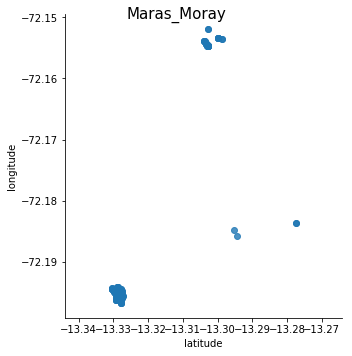

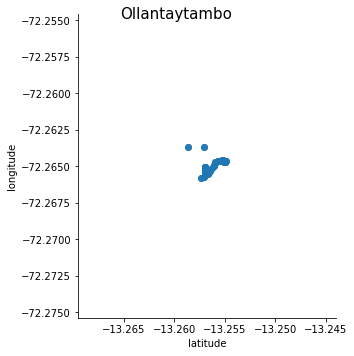

In [13]:
clusters = data.groupby(['label'])
count = 0
titles = ['Chincheros','MachuPicchu','Maras_Moray','Ollantaytambo']
dataframe_collection = {} 
for cluster, cdata in clusters:
    print(len(cdata))
    
    #Create new dataframe in order to reset index
    #new_cdata = pd.DataFrame(columns = cdata.columns)
    #dataframe_collection[titles[count]] = new_cdata.append(cdata , ignore_index=True)
    dataframe_collection[titles[count]] = cdata
    
    #plot data with seaborn
    facet = sns.lmplot(data=cdata, x='latitude', y='longitude', fit_reg=False, legend=True, legend_out=True)
    fig = facet.fig
    # Add a title to the Figure
    fig.suptitle(titles[count], fontsize=15)
    count += 1
    
    
    

In [14]:
print(titles[0])
dataframe_collection[titles[0]].head(5)

Chincheros


,date,time,latitude,longitude,name_file,Datetime,label
2,2019:12:25,21:23:03,-13.391979,-72.049106,007.jpg,2019-12-25 21:23:03,0
3,2019:12:25,21:23:04,-13.391979,-72.049106,008.jpg,2019-12-25 21:23:04,0
4,2019:12:21,11:32:12,-13.391929,-72.049114,009.jpg,2019-12-21 11:32:12,0
5,2019:12:21,11:32:12,-13.391929,-72.049114,010.jpg,2019-12-21 11:32:12,0
6,2019:12:21,11:32:21,-13.391916,-72.049036,011.jpg,2019-12-21 11:32:21,0


In [15]:
print(titles[1])
dataframe_collection[titles[1]].head(5)

MachuPicchu


,date,time,latitude,longitude,name_file,Datetime,label
96,2019:12:22,09:43:54,-13.165673,-72.545022,1000.jpg,2019-12-22 09:43:54,1
97,2019:12:22,09:44:15,-13.165598,-72.545007,1001.jpg,2019-12-22 09:44:15,1
98,2019:12:22,09:44:15,-13.165598,-72.545007,1002.jpg,2019-12-22 09:44:15,1
99,2019:12:22,09:44:27,-13.165441,-72.544975,1003.jpg,2019-12-22 09:44:27,1
100,2019:12:22,09:44:27,-13.165441,-72.544975,1004.jpg,2019-12-22 09:44:27,1


In [16]:
print(titles[2])
dataframe_collection[titles[2]].head(5)

Maras_Moray


,date,time,latitude,longitude,name_file,Datetime,label
608,2019:12:21,13:28:09,-13.298746,-72.153619,304.jpg,2019-12-21 13:28:09,2
609,2019:12:21,13:28:09,-13.298746,-72.153619,305.jpg,2019-12-21 13:28:09,2
610,2019:12:21,13:28:22,-13.299752,-72.153387,306.jpg,2019-12-21 13:28:22,2
611,2019:12:21,13:28:22,-13.299752,-72.153387,307.jpg,2019-12-21 13:28:22,2
612,2019:12:21,13:28:54,-13.299752,-72.153387,308.jpg,2019-12-21 13:28:54,2


## Applying clustering on cluster since there two different places

In [17]:
attributes = ['latitude','longitude']
mm_data = dataframe_collection[titles[2]]

X = mm_data[attributes].values

db = DBSCAN(eps=0.005, min_samples=6, metric='euclidean', algorithm='auto', leaf_size=30, p=None, n_jobs=1).fit(X)

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# adding labels to new feature
print(labels)
print(n_clusters_)

#adding label as new attribute
label_serie = pd.Series(labels)

mm_data['Second_clustering_label'] = label_serie.values

#Erasing noisy data
mm_data = mm_data.loc[mm_data.Second_clustering_label >= 0]
mm_data.head(5)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1]
2


,date,time,latitude,longitude,name_file,Datetime,label,Second_clustering_label
608,2019:12:21,13:28:09,-13.298746,-72.153619,304.jpg,2019-12-21 13:28:09,2,0
609,2019:12:21,13:28:09,-13.298746,-72.153619,305.jpg,2019-12-21 13:28:09,2,0
610,2019:12:21,13:28:22,-13.299752,-72.153387,306.jpg,2019-12-21 13:28:22,2,0
611,2019:12:21,13:28:22,-13.299752,-72.153387,307.jpg,2019-12-21 13:28:22,2,0
612,2019:12:21,13:28:54,-13.299752,-72.153387,308.jpg,2019-12-21 13:28:54,2,0


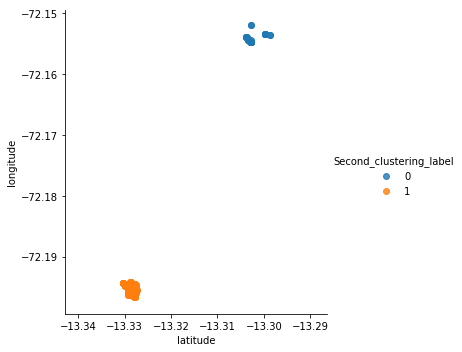

In [18]:
#plot data with seaborn
facet = sns.lmplot(data=mm_data, x='latitude', y='longitude', hue='Second_clustering_label', 
                   fit_reg=False, legend=True, legend_out=True)

In [19]:
# casting groupby.DataFrameGroupBy to DataFrame
mm_data = mm_data.apply(lambda x: x)
mm_data = mm_data.groupby(['Second_clustering_label'])

### Maras points ploting

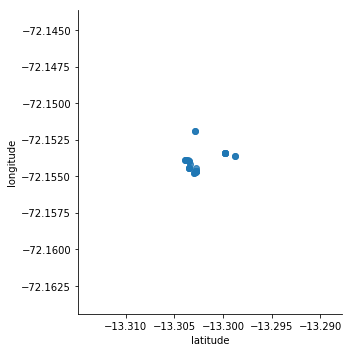

In [20]:
# 0 Maras
Maras = mm_data.get_group(0)

#plot data with seaborn
facet = sns.lmplot(data=Maras, x='latitude', y='longitude', 
                   fit_reg=False, legend=True, legend_out=True)

### Moray points ploting

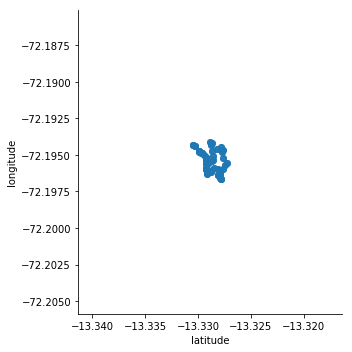

In [21]:
# 1 Moray
Moray = mm_data.get_group(1)
#plot data with seaborn
facet = sns.lmplot(data=Moray, x='latitude', y='longitude', 
                   fit_reg=False, legend=True, legend_out=True)

In [22]:
print(titles[3])
dataframe_collection[titles[3]].head(5)

Ollantaytambo


,date,time,latitude,longitude,name_file,Datetime,label
766,2019:12:21,16:46:54,-13.257305,-72.265809,476.jpg,2019-12-21 16:46:54,3
767,2019:12:21,16:46:54,-13.257305,-72.265809,477.jpg,2019-12-21 16:46:54,3
768,2019:12:21,16:47:15,-13.257065,-72.265728,478.jpg,2019-12-21 16:47:15,3
769,2019:12:21,16:47:15,-13.257065,-72.265728,479.jpg,2019-12-21 16:47:15,3
770,2019:12:21,16:47:39,-13.256986,-72.265620,480.jpg,2019-12-21 16:47:39,3
